In [46]:
####   import required function 
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage.filters import gaussian_filter1d

6.93535625
155
331


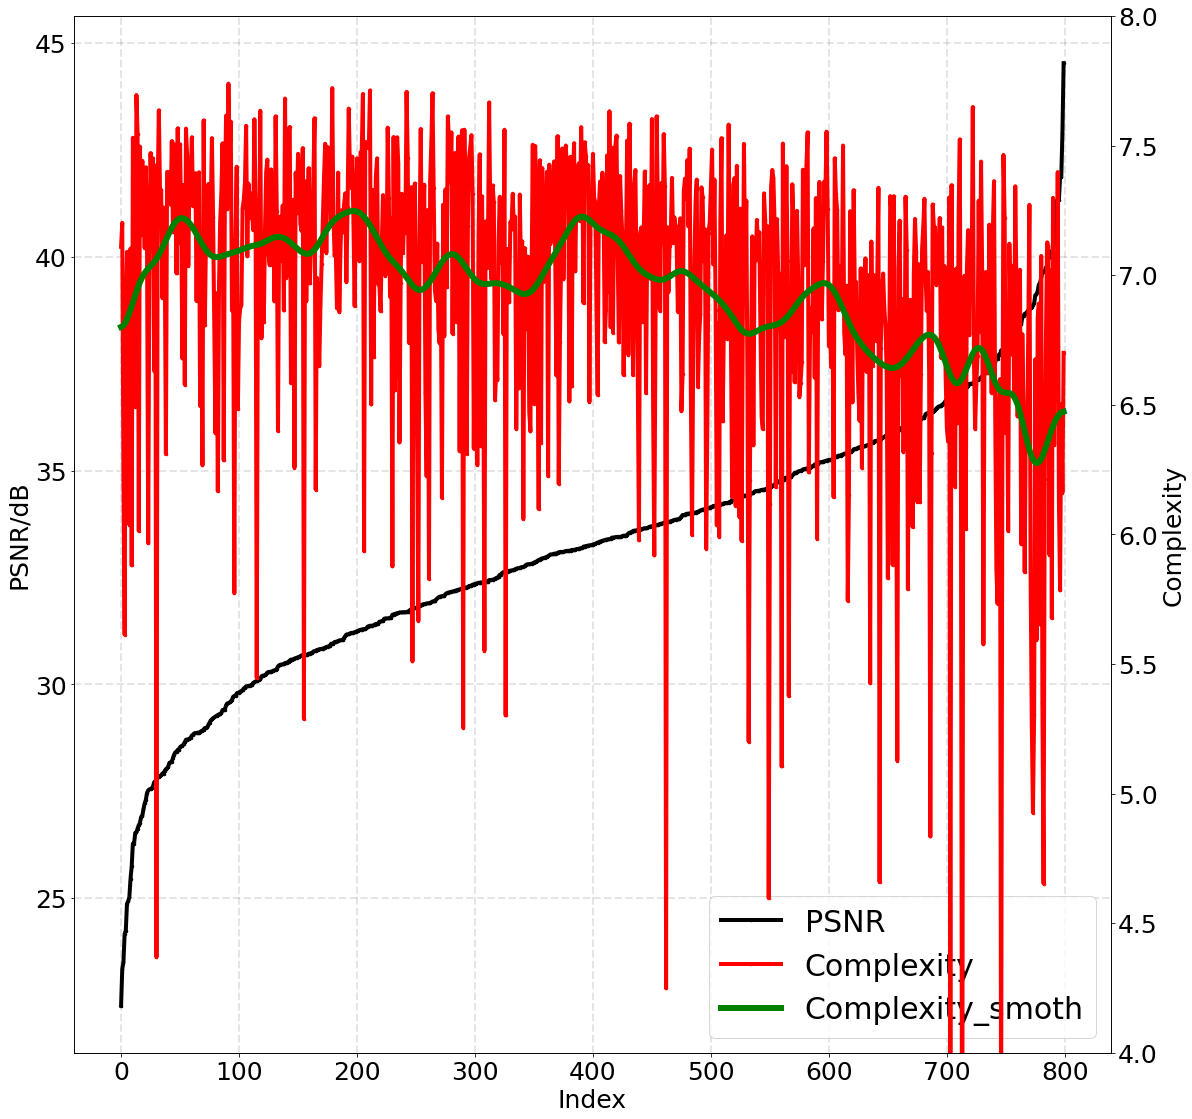

In [113]:
################   Image Entropy
fig = plt.figure(figsize=(18, 18))   
left, bottom, width, height = 0.2, 0.2, 0.8, 0.8  
ax1 = fig.add_axes([left, bottom, width, height])
ax2 = ax1.twinx()

images_num = 200
index = np.arange(0,images_num)

psnr_group = [31.4598, 33.9026, 35.2033, 31.7532, 29.9495, 33.8605, 31.0981, 35.9347,
        35.8591, 32.4460, 38.7524, 29.9603, 34.0727, 30.9804, 28.7486, 28.7583,
        30.7058, 31.8264, 34.0111, 29.2517, 32.6045, 33.0081, 37.7661, 26.3661,
        32.2530, 29.0411, 34.7615, 35.2609, 30.8398, 28.9813, 33.3921, 39.2278,
        30.9694, 35.5226, 36.4074, 31.4083, 33.2447, 28.4289, 28.3029, 35.0460,
        32.4206, 29.6175, 29.9462, 36.0780, 26.5440, 31.8695, 36.8040, 29.9542,
        32.0011, 36.5766, 32.4607, 34.3189, 33.7823, 33.7141, 34.3505, 41.3047,
        26.9324, 32.6823, 33.6035, 33.1290, 31.5827, 35.1934, 30.1472, 33.6848,
        34.8350, 29.1197, 33.8974, 24.1673, 31.4398, 31.6837, 39.3244, 33.7804,
        34.5842, 35.4935, 32.6304, 34.2516, 32.2258, 34.8213, 34.2093, 37.9486,
        37.4215, 26.3856, 30.8771, 34.6126, 38.8033, 36.6399, 29.2792, 37.5901,
        33.5953, 30.7261, 33.5350, 33.6927, 29.2223, 33.0298, 32.9800, 26.8957,
        27.0421, 39.9198, 27.7569, 33.1940, 34.4248, 33.3156, 29.4078, 30.2829,
        32.7571, 32.0294, 32.7358, 33.1225, 32.3279, 32.3277, 31.0880, 31.6041,
        32.2648, 34.6619, 31.0475, 35.6403, 35.6307, 31.2472, 35.2469, 28.9538,
        36.6942, 39.0786, 30.2502, 33.5941, 39.1091, 30.1016, 34.9346, 34.3464,
        32.3424, 31.4208, 32.8747, 30.1779, 32.3887, 25.8211, 31.6562, 39.7361,
        30.7593, 27.9655, 33.0035, 31.4360, 33.8543, 32.3339, 33.2682, 28.5247,
        32.3670, 34.5955, 34.2891, 32.5386, 34.1408, 34.0275, 29.9301, 32.0468,
        33.7641, 29.2295, 39.0074, 35.2905, 35.3559, 33.1172, 30.8347, 33.8533,
        36.9487, 36.1502, 28.6326, 30.3083, 33.1254, 35.0738, 37.4558, 37.4757,
        28.9036, 35.4289, 30.7003, 28.2759, 37.3671, 36.3363, 28.8784, 33.0460,
        30.6468, 33.4742, 39.7357, 33.5756, 33.8186, 35.7066, 28.7673, 36.1585,
        35.5409, 35.2589, 34.5688, 38.9666, 32.1743, 30.9634, 26.9595, 34.4163,
        33.5000, 30.4849, 30.9814, 33.2896, 34.0672, 40.1411, 33.0526, 35.6750]
complexity_group = [6.8972, 7.0128, 7.6200, 6.9142, 7.1645, 7.0324, 7.1402, 6.7192, 7.0322,
        7.5544, 5.5667, 7.4775, 7.3389, 7.2050, 7.3820, 7.3566, 7.5909, 7.1187,
        7.3616, 7.4288, 7.3658, 3.5690, 5.7091, 7.3169, 7.0521, 6.9442, 7.1288,
        7.2541, 7.6733, 6.9480, 6.6917, 6.7323, 6.7338, 7.3283, 7.2911, 7.4555,
        6.9501, 7.4195, 7.4529, 7.3337, 7.5103, 6.4045, 7.2715, 6.9050, 6.3270,
        7.2225, 7.3016, 7.2276, 6.7689, 6.3223, 7.4735, 6.8859, 6.4367, 7.4369,
        7.7117, 5.6925, 7.6958, 6.1269, 6.9409, 6.9904, 6.9686, 7.3599, 6.7320,
        7.5686, 7.0331, 7.1515, 7.2790, 5.6135, 7.3629, 6.9718, 6.0805, 7.0839,
        6.4536, 6.8540, 7.2416, 6.8083, 7.2557, 7.2963, 7.1935, 5.6533, 7.2323,
        6.5870, 7.0868, 6.8599, 7.0945, 7.2497, 7.3572, 6.1436, 7.5126, 7.1900,
        6.5522, 6.7159, 7.1113, 7.4530, 6.1271, 7.1539, 7.0881, 3.0684, 4.3691,
        7.2550, 6.9330, 7.2596, 6.2859, 7.5482, 7.5150, 5.2369, 6.7579, 6.9788,
        7.5607, 6.9360, 6.8601, 7.5002, 7.1914, 6.4155, 7.2141, 7.2176, 6.6012,
        7.3562, 5.6058, 7.4366, 6.9493, 6.2547, 7.1869, 6.9190, 7.2590, 6.9869,
        6.6503, 7.5094, 7.2022, 6.3748, 6.8229, 7.2216, 7.4284, 7.4707, 7.2412,
        7.2086, 7.6415, 6.8378, 6.2649, 6.6598, 6.7949, 7.3819, 6.2548, 6.8317,
        7.3935, 7.3859, 6.9421, 7.5375, 7.5464, 7.5010, 7.4257, 7.5591, 7.1407,
        7.0263, 7.0869, 7.1348, 6.4310, 7.5003, 6.6546, 6.2458, 4.9215, 6.8993,
        7.3819, 6.9573, 7.3477, 7.1316, 7.3160, 6.0355, 7.3470, 7.0177, 7.5147,
        7.1658, 6.8153, 7.4399, 7.3586, 7.4934, 6.7457, 7.0120, 6.7566, 7.3255,
        4.9991, 7.1637, 6.8661, 6.1003, 6.9834, 6.7492, 6.6455, 7.3617, 5.3743,
        6.7876, 7.4080, 7.4007, 7.5189, 7.2944, 6.9428, 6.4687, 7.5737, 5.6771,
        7.1213, 7.0005]

psnr_group, complexity_group = np.array(psnr_group), np.array(complexity_group)
index_sort = np.argsort(psnr_group)
psnr_group, complexity_group = psnr_group[index_sort], complexity_group[index_sort]

ins1 = ax1.plot(index, psnr_group, 'k.-', markersize=5, linewidth=4.0)
# ins2 = ax1.plot(index, gaussian_filter1d(psnr_group, sigma=5), 'b.--', markersize=5, linewidth=4.0)

ins3 = ax2.plot(index, complexity_group, 'r.-', markersize=5, linewidth=4.0)
ins4 = ax2.plot(index, gaussian_filter1d(complexity_group, sigma=15), 'g.-', markersize=5, linewidth=6.0)

ins = ins1+ins3+ins4
ax1.set_xlabel("Index", fontdict={ 'size': 25})
ax1.set_ylabel("PSNR/dB", fontdict={'size': 25})
ax2.set_ylabel("Complexity", fontdict={'size': 25})

ax2.set_ylim(4, 8.0)

ax1.tick_params(labelsize = 25)  
ax2.tick_params(labelsize = 25)  

ax1.legend(ins, ['PSNR',  'Complexity', 'Complexity_smoth'], prop={'size': 30}, loc='lower right')
ax1.grid(linewidth=2, alpha= 0.1, color='black',linestyle='--',)


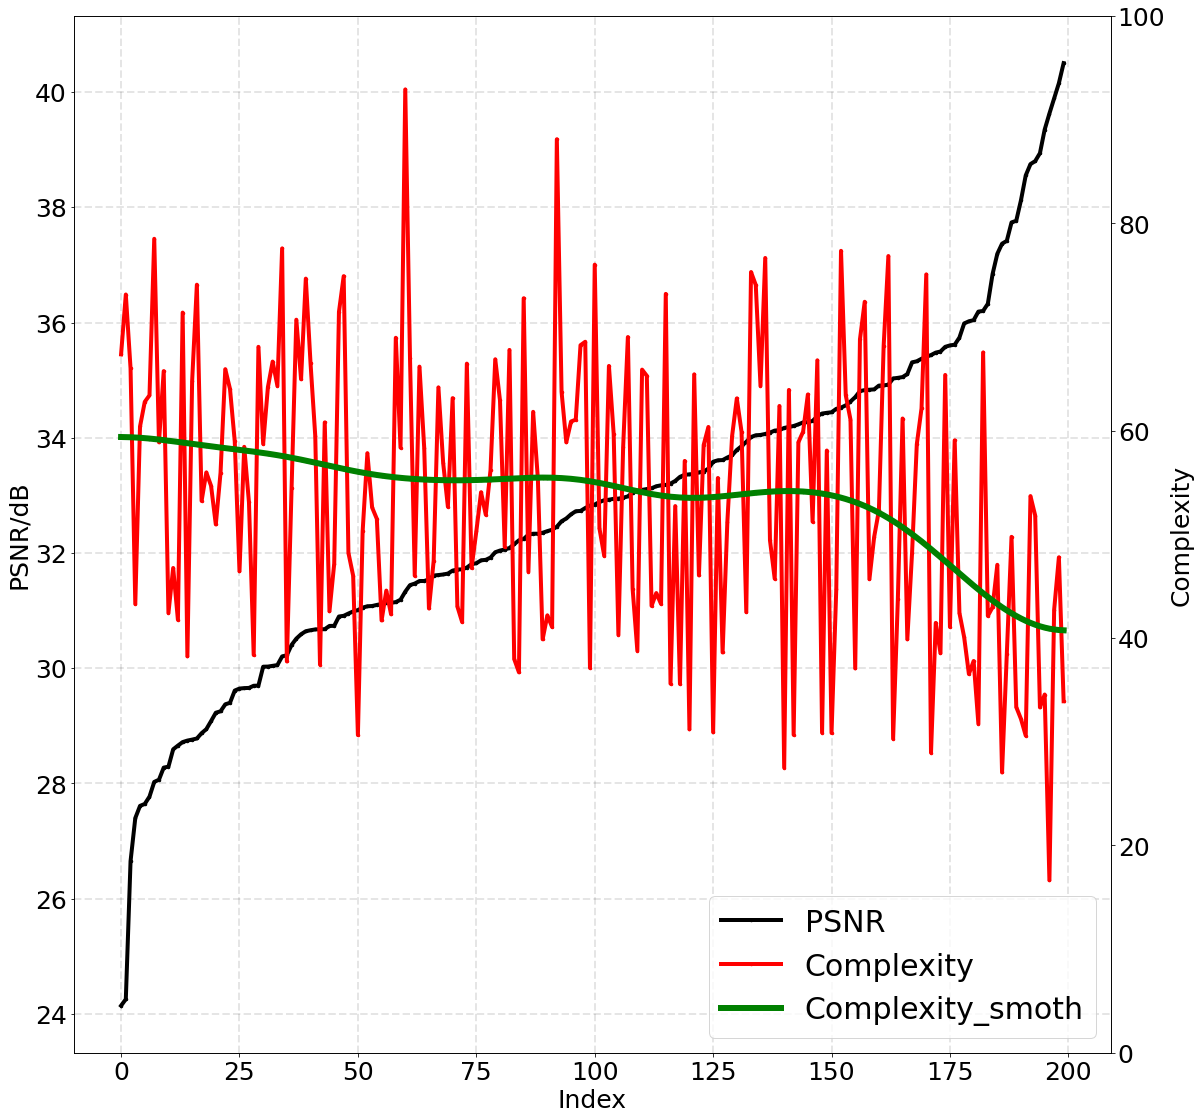

In [88]:
################   Standard Derivation
fig = plt.figure(figsize=(18, 18))   
left, bottom, width, height = 0.2, 0.2, 0.8, 0.8  
ax1 = fig.add_axes([left, bottom, width, height])
ax2 = ax1.twinx()

images_num = 200
index = np.arange(0,images_num)

psnr_group = [24.1421, 32.3175, 31.1470, 29.6118, 27.6099, 39.8892, 28.0257, 34.8270,
        39.3490, 30.6590, 32.9435, 33.8538, 32.9243, 33.1741, 32.0128, 31.8721,
        37.1927, 36.1890, 29.2270, 33.0486, 34.0659, 31.0793, 35.6144, 37.7664,
        34.0426, 33.2041, 30.9485, 36.3255, 29.2517, 31.5415, 32.9148, 35.1053,
        32.9822, 35.0533, 31.6264, 28.7603, 31.8069, 32.4556, 30.5892, 27.7710,
        34.1704, 38.9398, 30.6761, 37.4171, 32.0418, 28.6565, 27.3982, 31.0743,
        35.4779, 33.5836, 34.8329, 38.7498, 29.6949, 32.3339, 29.6577, 35.6027,
        31.7148, 34.0485, 30.6727, 30.0279, 27.6435, 34.9079, 34.4424, 31.6422,
        30.7337, 30.0415, 33.0803, 30.0258, 39.6272, 32.6715, 31.6088, 32.3788,
        35.5780, 32.7295, 38.8020, 31.9203, 34.8101, 36.2011, 32.5984, 31.5129,
        33.9298, 35.4351, 37.3684, 33.3211, 34.7050, 34.5231, 31.4686, 34.4324,
        36.0214, 31.8215, 31.1148, 33.1096, 28.7172, 32.8847, 32.3505, 31.7128,
        34.5013, 34.5622, 29.3723, 35.4967, 28.5918, 33.7878, 31.5133, 30.9090,
        37.7372, 31.3283, 35.0396, 30.5131, 30.9854, 33.4123, 32.0857, 32.8411,
        31.0514, 28.2907, 33.6126, 30.2255, 33.3981, 33.1817, 31.0982, 38.5536,
        35.3274, 34.4202, 35.3707, 31.6940, 30.0539, 35.3080, 40.5025, 32.7242,
        34.1868, 36.0408, 33.6085, 29.6542, 33.4648, 31.8811, 24.2547, 29.0817,
        33.1233, 34.1242, 34.8395, 31.4418, 32.3340, 36.8414, 35.9837, 32.8219,
        29.6465, 28.7434, 34.9054, 34.9216, 28.7796, 34.0129, 33.3640, 32.5502,
        33.0955, 31.1358, 31.1886, 31.1358, 32.4033, 28.0643, 34.2704, 29.6979,
        34.2663, 33.2501, 30.2037, 34.2039, 34.2916, 35.4049, 26.6502, 32.2198,
        35.0285, 31.0085, 30.6767, 32.7803, 33.6948, 28.8716, 38.1247, 28.2744,
        30.7349, 40.1546, 30.8972, 33.1579, 34.2323, 28.9419, 34.3733, 32.2433,
        31.6166, 30.4039, 30.6416, 34.6284, 33.3733, 33.6570, 35.7392, 32.1517,
        33.3577, 32.9587, 31.7470, 32.0599, 34.0895, 32.9403, 34.1317, 29.4000]
complexity_group = [67.3641, 46.4197, 68.9626, 58.9682, 60.4103, 42.7364, 78.5106, 72.4361,
        34.5548, 66.5063, 40.3280, 59.8931, 66.2460, 43.2950, 66.8852, 54.0652,
        47.0672, 31.7469, 50.9608, 44.7711, 76.6607, 52.5976, 59.0725, 33.3430,
        74.0620, 35.6012, 48.2224, 42.1385, 55.9452, 42.8542, 47.9392, 39.8822,
        69.0337, 61.1777, 56.9025, 64.7670, 46.7631, 88.1119, 64.9671, 63.4161,
        27.5119, 33.3167, 37.4382, 38.4575, 62.9152, 41.7589, 43.2949, 57.8315,
        41.4665, 30.9228, 45.6920, 53.6934, 38.3680, 61.8209, 53.0910, 41.0669,
        41.5560, 64.3408, 59.4765, 64.1998, 62.7848, 68.1555, 30.8432, 52.6651,
        42.5894, 66.6673, 38.7892, 58.7358, 16.6453, 60.8884, 47.4609, 42.1886,
        65.3785, 68.2495, 51.8123, 56.2030, 68.8110, 67.5473, 58.8848, 66.1792,
        42.5134, 28.9425, 27.0430, 35.5725, 37.0757, 77.3493, 46.0103, 58.0885,
        36.5311, 50.2815, 41.7003, 65.2952, 71.3936, 50.5753, 39.8828, 43.0503,
        44.7435, 63.4267, 65.9318, 38.5501, 46.7597, 63.1158, 58.3404, 74.9075,
        49.7640, 92.9135, 43.7438, 70.7064, 46.0048, 58.6187, 67.7935, 76.0170,
        50.2861, 42.4389, 38.6123, 37.7459, 46.0484, 73.1965, 51.4953, 30.5925,
        58.6887, 30.8798, 62.1549, 63.1416, 64.3436, 48.2139, 33.9074, 61.0702,
        63.9338, 37.7916, 55.4395, 58.4457, 60.3613, 51.8969, 73.1372, 54.6839,
        43.1071, 45.7249, 49.7598, 67.0277, 55.3356, 42.9773, 40.0857, 37.1186,
        46.4489, 38.2399, 52.3122, 76.8474, 74.0824, 75.3023, 31.1976, 63.7570,
        65.8915, 44.5792, 58.3679, 42.2952, 41.0701, 58.8856, 63.4948, 68.0910,
        59.9105, 52.7304, 77.5809, 30.6642, 51.2240, 75.0714, 66.0183, 36.6984,
        30.2954, 30.6427, 60.8018, 68.5787, 59.4717, 53.2289, 32.1945, 65.7504,
        47.1739, 47.7880, 71.4575, 44.3399, 58.8831, 55.9764, 66.7863, 72.7769,
        64.1763, 54.5068, 74.6693, 61.0683, 65.4327, 51.1930, 42.4281, 37.9826,
        57.0865, 58.4115, 66.4695, 48.7816, 49.4412, 59.7089, 62.3872, 64.0196]

psnr_group, complexity_group = np.array(psnr_group), np.array(complexity_group)
index_sort = np.argsort(psnr_group)
psnr_group, complexity_group = psnr_group[index_sort], complexity_group[index_sort]

ins1 = ax1.plot(index, psnr_group, 'k.-', markersize=5, linewidth=4.0)
# ins2 = ax1.plot(index, gaussian_filter1d(psnr_group, sigma=5), 'b.--', markersize=5, linewidth=4.0)

ins3 = ax2.plot(index, complexity_group, 'r.-', markersize=5, linewidth=4.0)
ins4 = ax2.plot(index, gaussian_filter1d(complexity_group, sigma=15), 'g.-', markersize=5, linewidth=6.0)

ins = ins1+ins3+ins4
ax1.set_xlabel("Index", fontdict={ 'size': 25})
ax1.set_ylabel("PSNR/dB", fontdict={'size': 25})
ax2.set_ylabel("Complexity", fontdict={'size': 25})

ax1.tick_params(labelsize = 25)  
ax2.tick_params(labelsize = 25)  
ax2.set_ylim(0, 100)


ax1.legend(ins, ['PSNR',  'Complexity', 'Complexity_smoth'], prop={'size': 30}, loc='lower right')
ax1.grid(linewidth=2, alpha= 0.1, color='black',linestyle='--',)
